In [ ]:
## Data Mining Part 1

** Implementing and Visualisation PCA**

**PCA** 

Principal component analysis is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
data=pd.read_csv('iris.csv')

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data=data.drop('Id',axis=1)

In [15]:
#splitting dependant and independant variable
x=data.iloc[:,:-1]
y=data['Species']
print('shape is ',x.shape)
print('shape is ',y.shape)

shape is  (150, 4)
shape is  (150,)


In [16]:
#spliting the dataset into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("shape of x_training",x_train.shape)
print("shape of x_test is ",x_test.shape)
print("shape of y_training",y_train.shape)
print("shape of y_test is ",y_test.shape)

shape of x_training (120, 4)
shape of x_test is  (30, 4)
shape of y_training (120,)
shape of y_test is  (30,)


**Standardization**

Standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms.

In [18]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_sc)
X_test_pca = pca.transform(x_test_sc)

In [21]:
X_train_pca

array([[ 1.27228206e+00,  3.57878727e-01],
       [ 1.52231770e-01, -2.99835283e-01],
       [-2.18764183e+00,  6.17154256e-01],
       [ 9.41913396e-01,  1.21810481e-02],
       [ 1.76227837e+00, -2.71066387e-01],
       [-8.16806401e-02, -1.04319475e+00],
       [-1.89794863e+00,  1.48464927e+00],
       [ 9.59395493e-01, -6.91087802e-01],
       [ 3.65661204e-01, -9.13013087e-02],
       [ 2.31845912e-01, -1.01891237e+00],
       [ 1.79730127e+00,  3.25092688e-01],
       [-2.40350676e+00, -2.44874760e-01],
       [ 1.82199968e+00,  5.93295049e-01],
       [-1.98427118e+00,  5.55515137e-01],
       [-2.17073306e+00,  1.13527621e+00],
       [-2.55598076e-01, -2.67039928e+00],
       [ 1.38862320e+00,  1.82768524e-01],
       [ 1.93409268e+00,  9.57133382e-01],
       [ 1.12243099e+00, -1.78242941e+00],
       [ 1.88169499e+00, -8.17365689e-01],
       [ 5.43123767e-02, -1.32586239e+00],
       [ 2.70365641e+00,  7.16489102e-01],
       [ 6.91516012e-01,  7.35561284e-01],
       [ 1.

In [24]:
data=pd.DataFrame({'x_train_pca0':X_train_pca[:,0],'x_train_pca1':X_train_pca[:,1],'Species':y_train})

In [25]:
data

,x_train_pca0,x_train_pca1,Species
137,1.272282,0.357879,Iris-virginica
84,0.152232,-0.299835,Iris-versicolor
27,-2.187642,0.617154,Iris-setosa
127,0.941913,0.012181,Iris-virginica
132,1.762278,-0.271066,Iris-virginica
...,...,...,...
9,-2.232890,-0.382580,Iris-setosa
103,1.350624,-0.117820,Iris-virginica
67,0.063099,-0.812311,Iris-versicolor
117,2.395400,2.450394,Iris-virginica


In [26]:
data

,x_train_pca0,x_train_pca1,Species
137,1.272282,0.357879,Iris-virginica
84,0.152232,-0.299835,Iris-versicolor
27,-2.187642,0.617154,Iris-setosa
127,0.941913,0.012181,Iris-virginica
132,1.762278,-0.271066,Iris-virginica
...,...,...,...
9,-2.232890,-0.382580,Iris-setosa
103,1.350624,-0.117820,Iris-virginica
67,0.063099,-0.812311,Iris-versicolor
117,2.395400,2.450394,Iris-virginica


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


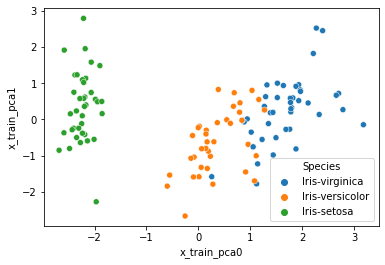

In [33]:
sns.scatterplot( data['x_train_pca0'], data['x_train_pca1'],hue=data['Species'])